In [ ]:
'''
    Use the interactive function to retrieve the indexes of the K-feldspar you will pick
'''

In [11]:
from load_masks_from_json import load_masks_from_json
import cv2
from scipy.ndimage import center_of_mass

In [4]:
image_path = 'To_be_seg/4536 Elemental Map.tiff'
json_path = 'Seg_Images/4536 Elemental Map/4536 Elemental Map.json'

In [7]:
masks = load_masks_from_json(json_path)
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [8]:
iterated_index_to_be_removed = [189, 183, 72, 89, 136, 156, 161, 163, 166, 168, 169, 181, 191, 194, 195, 196, 197, 200, 201, 202, 204, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 227, 228]

In [9]:
# K_grain_idx = [33, 18, 90, 73, 38, 50, 20, 39, 34, 89, 60, 80, 95, 41, 42, 3, 59, 28, 49, 17, 85, 1, 69, 46, 2, 51, 11, 25, 30, 71, 82, 44, 58, 45, 36, 57, 61, 75, 78, 72, 29, 54, 0, 22, 6, 66, 52, 12, 21, 67, 10, 5, 37, 48, 47, 8, 13, 15, 31, 4, 43, 32, 62, 77, 27, 16, 79, 70]
# K_grain_idx = [33, 18, 50, 20, 39, 34, 11, 51, 2, 1, 42, 3, 28, 49, 17, 6, 22, 0, 5, 10, 21, 12, 13, 31, 72, 29, 62, 32, 4, 15, 8, 47, 14, 27, 16, 77, 85, 59, 73, 46, 38, 41, 80, 60, 89, 95, 79, 70, 30, 71, 58, 45, 36, 44, 82, 25, 57, 78, 61, 75, 90, 54, 52, 67, 43]
perfect_K_idx_USU_4536 = [22, 121, 57, 17, 68, 59, 3, 74, 41, 40, 115, 84, 33, 20, 45, 90, 2, 9, 0, 12, 148, 13, 23, 31, 16, 51, 29, 4, 95, 32, 26, 7, 164, 133, 36, 67, 167, 55, 64, 124, 70, 192, 24, 63, 111, 10, 116, 112, 65, 127, 39, 42, 130, 185, 140, 38, 76, 49, 77, 50, 82, 98, 149, 101, 46, 99]

In [26]:
general_K_with_some_Na_exsolution = [28, 57, 121, 51, 22, 29, 43, 16, 47, 4, 21, 32, 95, 58, 108, 101, 73, 52, 83, 35, 19, 164, 175, 7, 26, 84, 33, 20, 45, 90, 13, 133, 23, 46, 81, 36, 62, 67, 53, 178, 10, 44, 31, 38, 76, 49, 9, 144, 127, 39, 74, 41, 40, 99, 68, 59, 3, 42, 82, 50, 30, 98, 77, 0, 55, 64, 124, 48, 192, 158, 14, 25, 1, 60, 70, 24, 63, 6, 111, 65, 116, 112, 148, 170, 193, 12, 128, 27, 149, 130, 2, 8, 115, 18, 167, 17, 91, 107, 87, 157, 140, 185]

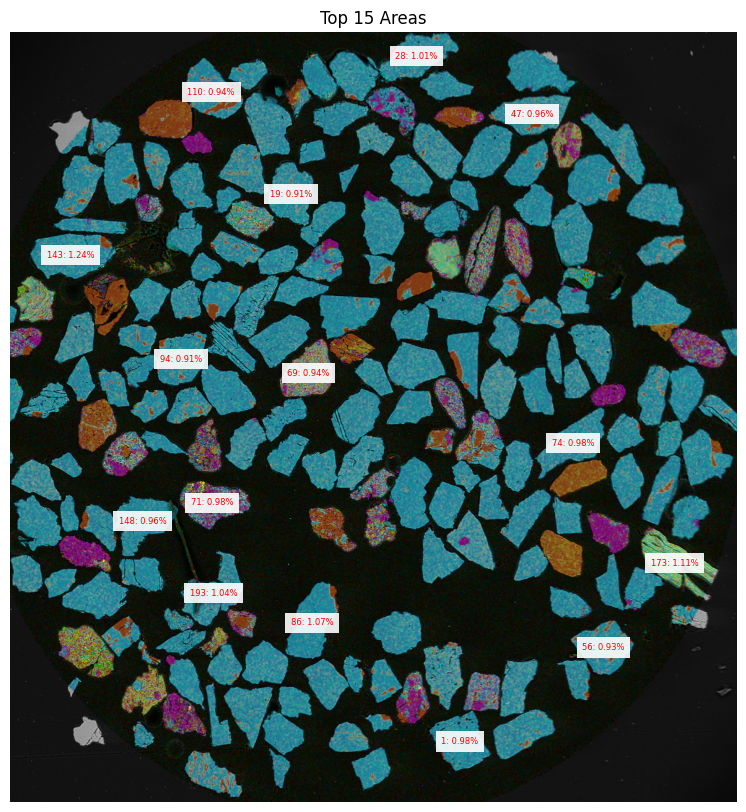

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_and_display_top_areas(image, masks, filter_list=None):
    """
    Calculate the area and its percentage to the total grain area for all the grains/masks,
    and display the top 10.

    Parameters:
    image (numpy array): The image to display.
    masks (list): The list of masks.
    filter_list (list): The list of indices to exclude from calculations (optional).

    Returns:
    None
    """
    # Generate idx_list by enumerating each mask
    idx_list = list(range(len(masks)))

    # If filter_list is provided, filter out the indices that are in the filter_list
    if filter_list is not None:
        idx_list = [idx for idx in idx_list if idx not in filter_list]

    # Step 1: Calculate the area of each grain in the filtered idx_list
    areas = [(idx, np.sum(masks[idx]['segmentation'])) for idx in idx_list]

    # Calculate the total area
    total_area = sum(area for idx, area in areas)

    # Step 2: Calculate the percentage of each grain area
    areas_percentage = [(idx, (area / total_area) * 100) for idx, area in areas]

    # Step 3: Sort the areas by percentage in descending order
    areas_percentage_sorted = sorted(areas_percentage, key=lambda x: x[1], reverse=True)

    # Step 4: Display the top 15 areas
    top_10_areas = areas_percentage_sorted[:15]

    # Create a figure for displaying the image with labels
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image)
    ax.axis('off')

    for idx, percentage in top_10_areas:
        segmentation_mask = np.array(masks[idx]['segmentation']).astype(np.uint8)
        if np.any(segmentation_mask):
            y, x = center_of_mass(segmentation_mask)
            ax.text(x, y, f'{idx}: {percentage:.2f}%', color='red', fontsize=6, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.9, edgecolor='none'))

    plt.title('Top 15 Areas')
    plt.show()

# Example usage
# image = ... # Your image as a numpy array
# masks = ... # Your list of masks
# filter_list = [2, 4, 6] # Indices to exclude

# Call the function
calculate_and_display_top_areas(image, masks, iterated_index_to_be_removed)

In [14]:
import numpy as np

def calculate_noted_area_percentage(masks, noted_indices, filter_list=None):
    """
    Calculate the percentage of the total grain area that has been noted.
    Usually the noted area is a certain type of feldspar, like K-feldspar.

    Parameters:
    masks (list): A list of dictionaries, where each dictionary represents a grain 
                  and contains a 'segmentation' key with a binary mask as its value.
    noted_indices (list): A list of indices representing the grains that have been noted.
    filter_list (list): A list of indices to exclude from calculations (optional).

    Returns:
    float: The percentage of the total grain area that has been noted.
    """
    # Generate idx_list by enumerating each mask
    idx_list = list(range(len(masks)))

    # If filter_list is provided, filter out the indices that are in the filter_list
    if filter_list is not None:
        idx_list = [idx for idx in idx_list if idx not in filter_list]

    # Ensure noted_indices are within the filtered idx_list
    valid_noted_indices = [idx for idx in noted_indices if idx in idx_list]

    # Step 1: Calculate the area of each grain in the filtered idx_list
    areas = [np.sum(masks[idx]['segmentation']) for idx in idx_list]

    # Step 2: Sum the area of valid noted grains
    sum_noted_areas = sum(areas[idx_list.index(idx)] for idx in valid_noted_indices)

    # Step 3: Sum the total area of all grains in the filtered idx_list
    total_area = sum(areas)

    # Step 4: Calculate the percentage of the noted grain area
    if total_area == 0:
        return 0.0  # To handle division by zero in case of no area
    percentage_noted_area = (sum_noted_areas / total_area) * 100

    return percentage_noted_area


In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def highlight_specific_segments(image, masks, highlight_indexes,title=None):
    """
    Highlight specific segments on the original image based on the provided indexes and display
    both the original and highlighted images side-by-side.

    Args:
        image (numpy.ndarray): The original image as a NumPy array (RGB).
        masks (list): List of segmentation masks. Each mask is a dictionary with 'segmentation' key.
        highlight_indexes (list): List of indexes corresponding to the masks to highlight.
    """
    # Make a copy of the original image to apply highlights
    highlighted_image = image.copy()

    # Iterate through the specified mask indexes and highlight the segments
    for idx in highlight_indexes:
        if idx < 0 or idx >= len(masks):
            print(f"Warning: Index {idx} is out of bounds for the masks list.")
            continue

        # Extract the mask
        mask_data = masks[idx]
        mask = np.array(mask_data['segmentation'], dtype=np.uint8)

        # Ensure the mask matches the image size
        if mask.shape[:2] != image.shape[:2]:
            print(f"Warning: Mask {idx} dimensions {mask.shape[:2]} do not match image dimensions {image.shape[:2]}")
            continue

        # Apply a red highlight to the mask area with transparency
        alpha = 0.4  # Transparency level
        highlighted_image[mask > 0] = (1 - alpha) * highlighted_image[mask > 0] + alpha * np.array([255, 0, 0])

    # Display the original and highlighted images side-by-side
    plt.figure(figsize=(15, 8))

    # Subplot 1: Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

    # Subplot 2: Highlighted Image
    plt.subplot(1, 2, 2)
    plt.imshow(highlighted_image)
    plt.title("Highlighted K-spars")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# USU-4536 Perfect K Grains (Don't Delete, use another copy for other tasks)

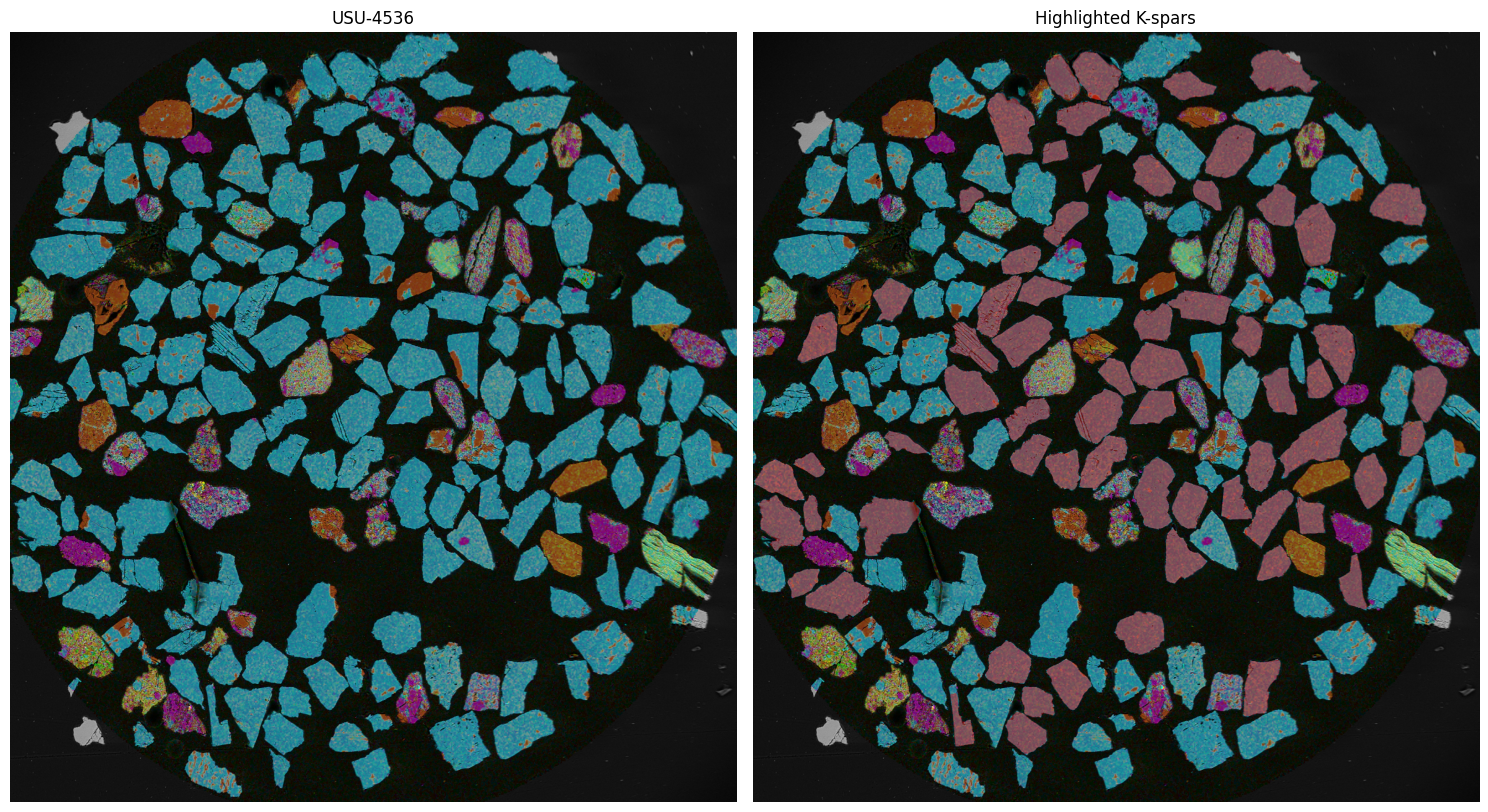

In [38]:
highlight_specific_segments(image, masks, perfect_K_idx_USU_4536, title='USU-4536')

In [15]:
# Calculate the percentage of noted grain area
percentage_noted_area = calculate_noted_area_percentage(masks, perfect_K_idx_USU_4536, iterated_index_to_be_removed)
print(f"Percentage of noted grain area: {percentage_noted_area:.2f}%")

Percentage of noted grain area: 35.22%


# USU-4536 K Grains

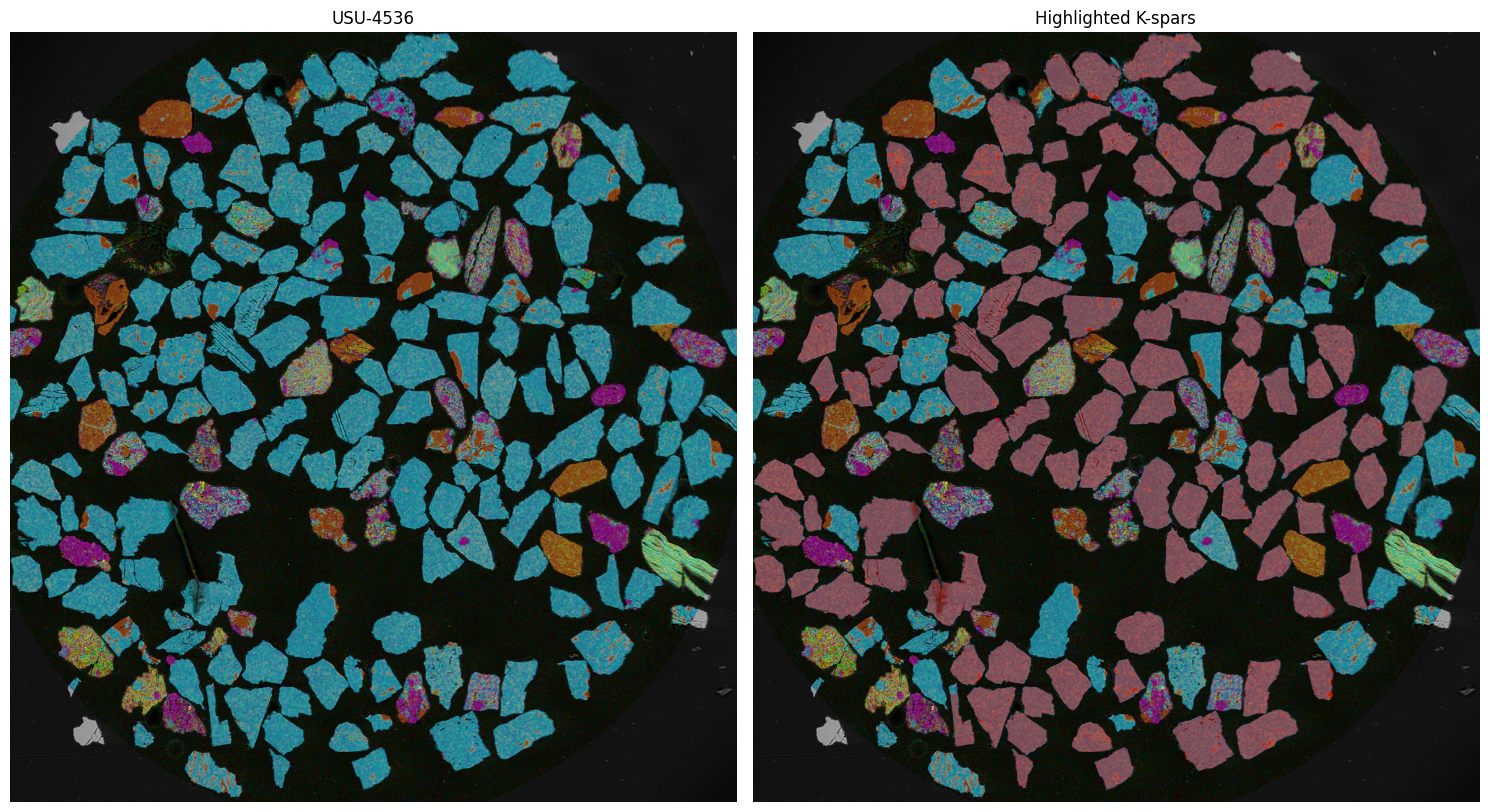

In [39]:
highlight_specific_segments(image, masks, general_K_with_some_Na_exsolution, title='USU-4536')

In [32]:
percentage_noted_area = calculate_noted_area_percentage(masks, general_K_with_some_Na_exsolution, iterated_index_to_be_removed)
print(f"Percentage of noted grain area: {percentage_noted_area:.2f}%")

Percentage of noted grain area: 54.73%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import center_of_mass

def display_select_idx_masks(image, masks, filter_list, idx_list, highlight_color='yellow'):
    """
    Display an image with labeled masks interactively, highlighting the masks specified in idx_list.

    Parameters:
    image (numpy array): The image to display.
    masks (list): The list of masks.
    idx_list (list): The list of indices to highlight.
    highlight_color (str): The color for the highlighted masks' text boxes (default is 'yellow').
    filter_list (list): The list of indices to exclude from display (optional).

    Returns:
    None
    """
    # Create a figure for displaying the image with labels
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image)
    ax.axis('off')
    
    # Label each mask by its index
    for idx, segmentation_entry in enumerate(masks):
        if filter_list is not None and idx in filter_list:
            continue
        segmentation_mask = np.array(segmentation_entry['segmentation']).astype(np.uint8)
        if np.any(segmentation_mask):
            y, x = center_of_mass(segmentation_mask)
            if idx in idx_list:
                ax.text(x, y, str(idx), color='red', fontsize=6, ha='center', va='center', bbox=dict(facecolor=highlight_color, alpha=0.9, edgecolor='none'))
            else:
                ax.text(x, y, str(idx), color='red', fontsize=6, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.9, edgecolor='none'))

    plt.show()


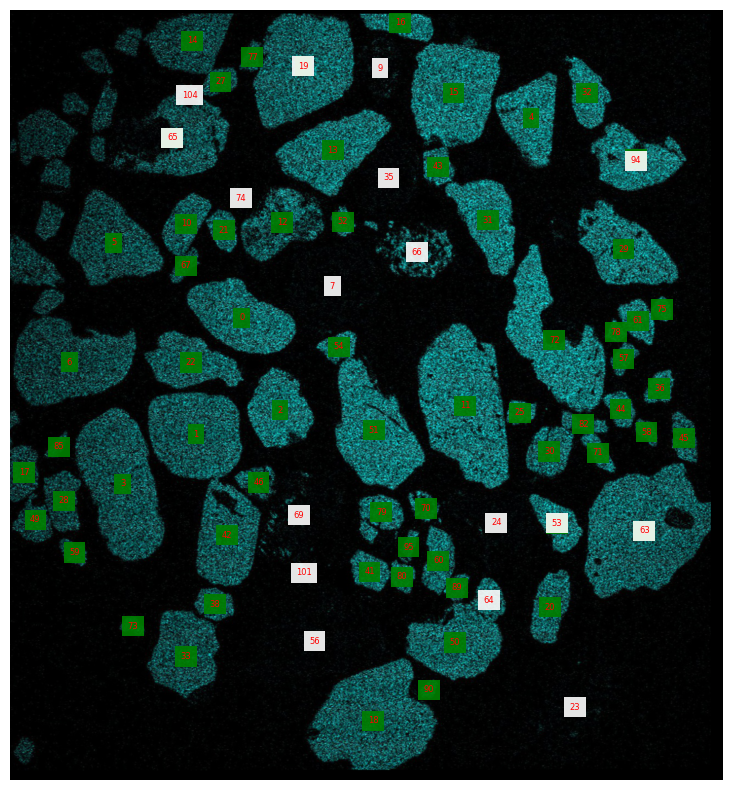

In [ ]:
display_select_idx_masks(image_K, masks, filter_list=indice_not_recognizable_in_composite, idx_list=K_grain_idx, highlight_color='green')

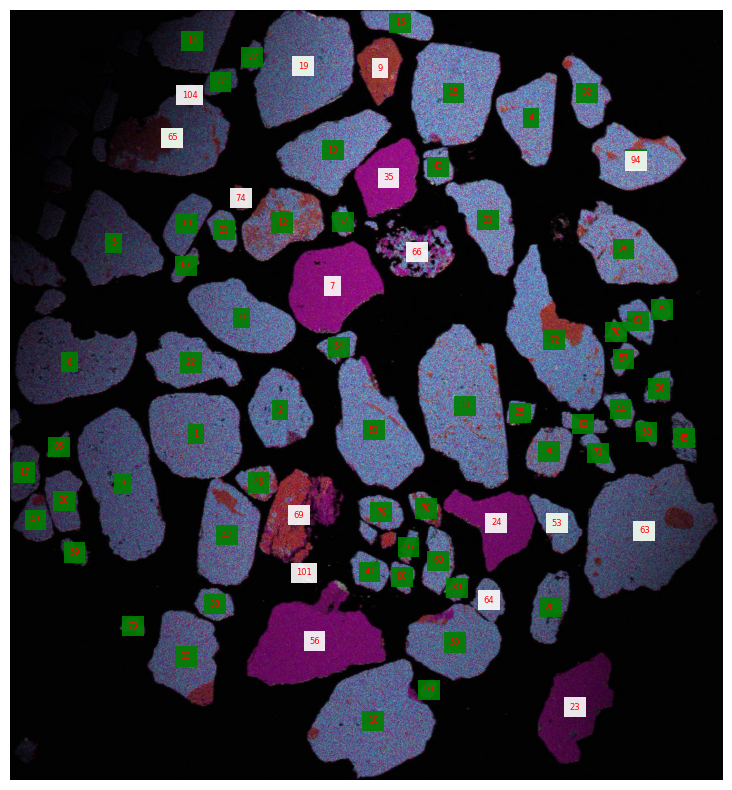

In [ ]:
display_select_idx_masks(image, masks, filter_list=indice_not_recognizable_in_composite, idx_list=K_grain_idx, highlight_color='green')